/home/u1804/pythonwork
typeA-size= 512 512


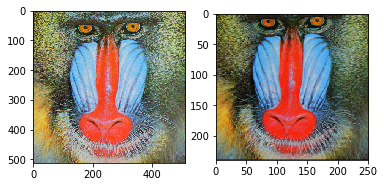

In [393]:
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import sys

# import os.path
print(path)


a="LR";b="HR";c="bicubic" ;d="nearest";e="SRCNN";f="kim";g="ScSR";h="glasner" ;i="HR2"
mun="001"

typeA=i
typeB=a

imF = Image.open(path+"/Set14-image_SRF_2/img_"+mun+"_SRF_2_"+typeA+".png") 
imG = Image.open(path+"/Set14-image_SRF_2/img_001_SRF_2_"+typeB+".png") 

iTarr=np.array(imF) 
iTarrG=np.array(imG)
print('typeA-size=',imF.size[0], imF.size[1] )

ax1=plt.subplot(1, 2, 1)
plt.imshow(imF)

ax2=plt.subplot(1, 2, 2 )
plt.imshow(imG)
plt.show()


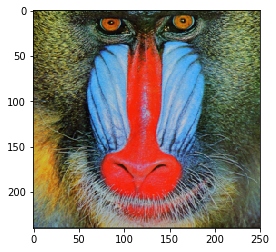

In [372]:

# img_bgr = cv2.imread('imF')
# # 將 BGR 圖片轉為 RGB 圖片
# img_rgb = img_bgr[:,:,::-1]
# # 使用 Matplotlib 顯示圖片

plt.imshow(imF)
plt.show()


In [476]:
k=2
# Full Resize image 預處理
[widthG,heightG,color]=iTarr.shape
resize_image = imF.resize((widthG//k, heightG//k), Image.BILINEAR)
resize_image.save("R"+str(k)+"esize-img_"+mun+"_SRF_2_"+typeA+".jpg")


im = Image.open("R"+str(k)+"esize-img_"+mun+"_SRF_2_"+typeA+".jpg")
imTarry=np.array(im)
widthK = im.size[0]
heightK = im.size[1]
print('Resize-img,k=',k,im.size[0], im.size[1] )



k2=2
R2esize = im.resize((widthK//k2, heightK//k2), Image.BILINEAR)
imTarry2=np.array(R2esize)
width = R2esize.size[0]
height = R2esize.size[1]

print('R2esize-img,k2=',k2,R2esize.size[0], R2esize.size[1] )





Resize-img,k= 2 256 256
R2esize-img,k2= 2 128 128


In [477]:
m=2
n=3
xyLable=np.empty(shape=[0, m])
rgbLable=np.empty(shape=[0, n])
nom=255

for x in range(width):
    for y in range(height):
        r, g, b = pix[x, y]
        xy = np.array([[x, y]], np.int)
        rgb = np.array([[r, g , b]], np.int)

        xyLable =np.vstack((xyLable, xy))
        rgbLable=np.vstack((rgbLable, rgb))
#        print(x)


data = xyLable.astype('float32')/width
label= rgbLable.astype('float32')/255.0

print(width)

128


In [478]:
import math 

index = [i for i in range(len(xyLable))]
np.random.shuffle(index)

data = data[index]
label= label[index]
#X_train, X_test, y_train, y_test 

# 向上取整
# print(math.ceil(num))

v=R2esize.size[0]*R2esize.size[1]*(3/5)
v=math.floor(v) # 向下取整
print(v)

X_train=data[0:v]
X_test=data[v:]

y_train=label[0:v]
y_test=label[v:]


9830


In [64]:
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # we only take the first two features.
y_iris = iris.target

# print(iris.target)
print(iris.data[:5, :2])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


-0.1 1.0921875


([], <a list of 0 Text yticklabel objects>)

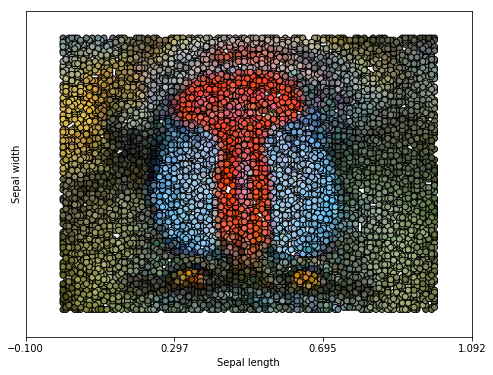

In [479]:
x_min, x_max = X_train[:, 0].min() - .1, X_train[:, 0].max() + .1
y_min, y_max = X_train[:, 1].min() - .1, X_train[:, 1].max() + .1

print(x_min, x_max )

plt.figure(2, figsize=(8, 6))
plt.clf()
# .cla ,close 

# Plot the training points ,cmap=plt.cm.Set1
cm = plt.cm.get_cmap('RdYlBu')  

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

new_ticks = np.linspace(x_min, x_max, 4)
# print(new_ticks)
plt.xticks(new_ticks)

# plt.xticks(())
plt.yticks(())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 60)                180       
_________________________________________________________________
dense_20 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_21 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_22 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_23 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 183       
Total params: 15,003
Trainable params: 15,003
Non-trainable params: 0
_________________________________________________________________
//////

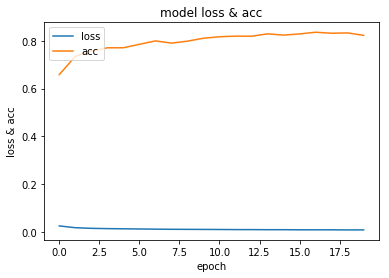

Time taken:  13.299 mins.
#############################################################################
Test loss: 0.008435733736391319
Test accuracy: 0.8422177009276917


In [432]:
# import tensorflow as tf
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# import keras.backend.tensorflow_backend as KTF

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

from keras.layers import Input, Embedding, LSTM, Dense

import time
from datetime import datetime as dt

tStart = time.time()#計時開始

model = Sequential()
model.add(Dense(units=60, # hide=10
                activation='relu',
                kernel_initializer='normal',
                input_shape=(2,)))

model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

model.compile(loss='mse',       # categorical_crossentropy' , mse
              optimizer=RMSprop(lr=0.0008, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
              # optimizer='sgd')
print('/////////////////////////////////////////////////////////////////////////')
print(y_train[0:3])
print('/////////////////////////////////////////////////////////////////////////')

epochs=20
print('v =',v )

batch_size=128 #64
history=model.fit(X_train[0:v], y_train[0:v], # x_train[0:600]
                    batch_size=1,
                    shuffle=True,               # 要不要打乱数据 (打乱比较好)
                    epochs=epochs,
                    # num_workers=2,              # 多线程来读数据
                    verbose=1)

plt.plot()
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title('model loss & acc')
plt.ylabel('loss & acc')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'], loc='upper left')
plt.show()

end = time.time()
elapsed = end - tStart
print ("Time taken: ", ('%.3f'%(elapsed/60)), "mins.") # (seconds/1 , min /60)


print('#############################################################################')

score = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



(65536, 2)


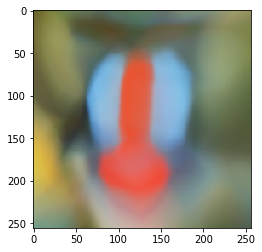

In [460]:
rgbPredict=0
p_rgbLable=0

k=2
FrgbPredict=np.empty(shape=[0, m]) # np.empty(shape=[0, 3])
rgbInput=np.empty(shape=[0, 3])
xypInput=np.empty(shape=[0, m])

for x in range(width*k):
    xinp = (x//k) + (x % k) / k
    for y in range(height*k):
        yinp = (y//k) + (y % k) / k
        xyRgb = np.array([[xinp/width, yinp/height]], np.float)
        FrgbPredict = np.vstack((FrgbPredict, xyRgb))
        if((x % k) / k==0) & ((y % k) / k==0):
            # rgb=rgbLable[x//k*y//k+y//k]
            rgbI=imTarry[ x//k , y//k , : ]
            xyP = np.array([0.1, 0.1], np.float)
        else:
            xyP = np.array([[xinp/width, yinp/height]], np.float)
            rgbI = np.array([127, 127, 127], np.float)

        rgbInput = np.vstack((rgbInput, rgbI))
        xypInput = np.vstack((xypInput, xyP))

# g = model.predict(xyPredict)
print(FrgbPredict.shape)


pr1= model.predict(FrgbPredict)
# print("shape & model.predict",g.shape,g[:5])
pr1=np.reshape(pr1, (width*k,height*k, 3), order='F')  # C ,F
pr1 *= 255//1
pr1=pr1.astype(int) 

plt.imshow(pr1)

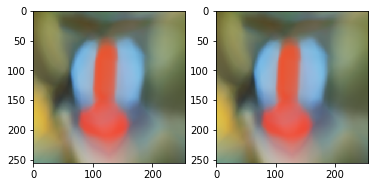

(256, 256, 3)


In [461]:

pr2= model.predict(FrgbPredict)
# print("shape & model.predict",g.shape,g[:5])
pr2=np.reshape(pr2, (width*k,height*k, 3), order='F')  # C ,F
pr2 *= 255//1
pr2=pr2.astype(int) 


plt.subplot(1, 2, 1)
plt.imshow(pr1)

plt.subplot(1, 2, 2 )
plt.imshow(pr2)
plt.show()


print(pr1.shape)

(6554, 3)


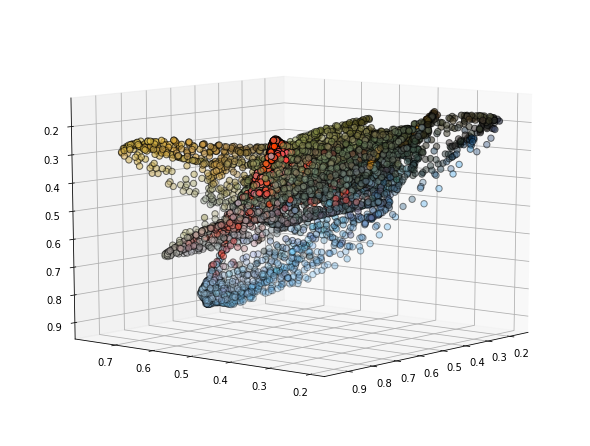

In [437]:
# Predict on new data
y_Sequential = model.predict(X_test)

X_reduced = y_Sequential

fig = plt.figure(1, figsize=(8, 6))

ax = Axes3D(fig, elev=-170, azim=140)
#X_reduced = PCA(n_components=3).fit_transform(iris.data) ,

print(X_reduced.shape)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_test,
           cmap=plt.cm.Set1, edgecolor='k', s=40)


In [154]:
from sklearn.svm import SVR

# Fit regression model

# svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# svr_lin = SVR(kernel='linear', C=100, gamma='auto')
# svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
#                coef0=1)



In [438]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)


regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                                       random_state=2)
regr_rf.fit(X_train, y_train)


svr_multirf = MultiOutputRegressor(SVR(kernel='rbf', C=100,gamma=0.1,
                                                    degree=1, epsilon=.1,
                                                                coef0=1))
svr_multirf.fit(X_train, y_train)


MultiOutputRegressor(estimator=SVR(C=100, cache_size=200, coef0=1, degree=1, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
           n_jobs=None)

PSNR 23.80510
epochs ; batch_size = 20 , 128
PSNR 23.77907


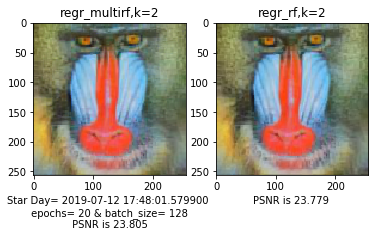

In [486]:
def psnr(original, contrast):
    [width, height, color] = original.shape
    error = np.zeros((width, height, color), dtype=int)  # uint8'
    error = (original[0:width, 0:height, 0:color] - contrast[0:width, 0:height, 0:color]) ** 2

#     print("error[0,0:2,:]=", error[0, 0:2, :])
#     print("original[0,0:2,:]=", original[0, 0:2, :])
#     print("contrast[0,0:2,:]=", contrast[0, 0:2, :])
#     print("original[0,0:2,:]-contrast[0,0:15,:]=", "error[0,0:5,:]=", original[0, 0:2, :] - contrast[0, 0:2, :])

#     print("np.sum(error).info=", np.sum(error), "/width*height*color= ", width * height * color)
    mse = np.sum(error) / (width * height * color)

#     print("error.info", error.dtype, error.shape)
#     print("255**2 = ", 255 ** 2, "& mse=", mse)
#     print("255**2/mse=", 255 ** 2 / mse)

    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    psnr=(20 * math.log10(PIXEL_MAX)) - (10 * math.log10(mse))
    #print("PSNR",'%.6f'%(psnr))
    
    return psnr


# regr_multirf , svr_multirf ,regr_rf
pr3= regr_multirf.predict(FrgbPredict)
pr3=np.reshape(pr3, (width*k,height*k, 3), order='F')  # C ,F
pr3 *= 255//1
pr3=pr3.astype(int) # 'uint8'

pr4= regr_rf.predict(FrgbPredict)
pr4=np.reshape(pr4, (width*k,height*k, 3), order='F')  # C ,F
pr4 *= 255//1
pr4=pr4.astype(int) # 'uint8'


d3=psnr(imTarry,pr3)  # imog , imog2
print("PSNR",'%.5f'%(d3))
PSNR3='%.3f'%(d3)
print("epochs ; batch_size =",epochs ,",",batch_size )


d4=psnr(imTarry,pr4)  # imog , imog2
print("PSNR",'%.5f'%(d4))
PSNR4='%.3f'%(d4)
# print("epochs ; batch_size =",epochs ,",",batch_size )


plt.subplot(1, 2, 1)
plt.title("regr_multirf,k=%s"%(k) )# title
plt.xlabel("Star Day= %s \n epochs= %s & batch_size= %s \n PSNR is %s "%(dt.today(),epochs, batch_size,PSNR3))#x轴上的
plt.imshow(pr3)

plt.subplot(1, 2, 2)
plt.title("regr_rf,k=%s"%(k) )# title
plt.xlabel("PSNR is %s "%(PSNR4))#x轴上的
plt.imshow(pr4)
plt.show()



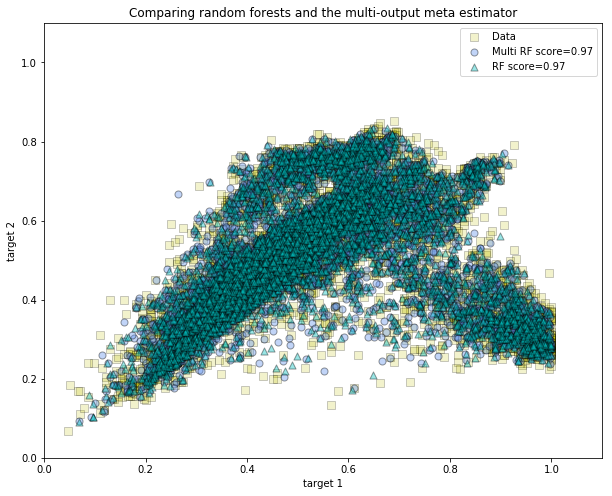

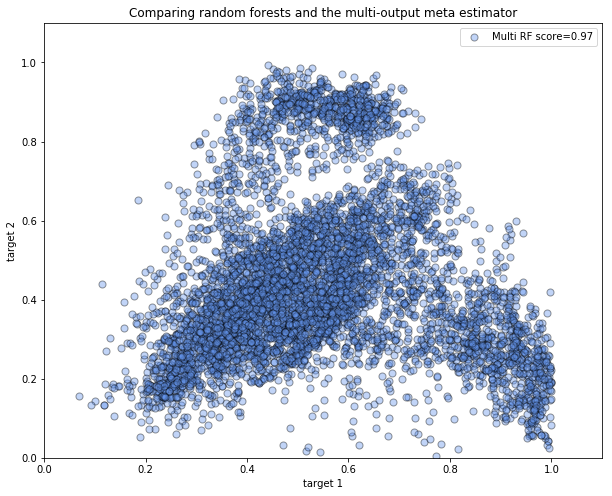

In [487]:

# Plot the results c=navy
plt.figure(1, figsize=(10, 8))

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)
y_svr=svr_multirf.predict(X_test)


# Plot the results c=navy
plt.figure(1, figsize=(10, 8))
s = 50
a = 0.4

plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="y", s=s, marker="s", alpha=0.2, label="Data")

plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))

plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))

plt.xlim([0., 1.1])
plt.ylim([0., 1.1])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

# Plot the results c=navy
plt.figure(2, figsize=(10, 8))
s = 50
a = 0.4

# plt.scatter(y_test[:, 0], y_test[:, 2], edgecolor='k',
#             c="y", s=s, marker="s", alpha=0.2, label="Data")

plt.scatter(y_multirf[:, 0], y_multirf[:, 2], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))

# plt.scatter(y_rf[:, 0], y_rf[:, 2], edgecolor='k',
#             c="c", s=s, marker="^", alpha=a,
#             label="RF score=%.2f" % regr_rf.score(X_test, y_test))

plt.xlim([0., 1.1])
plt.ylim([0., 1.1])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()


(6554, 3)


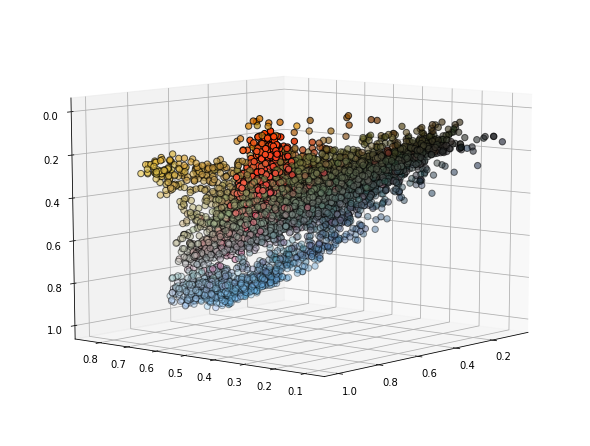

In [488]:
X_reduced = y_rf

fig = plt.figure(1, figsize=(8, 6))

ax = Axes3D(fig, elev=-170, azim=140)
#X_reduced = PCA(n_components=3).fit_transform(iris.data) ,

print(X_reduced.shape)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_test,
           cmap=plt.cm.Set1, edgecolor='k', s=40)


(6554, 3)


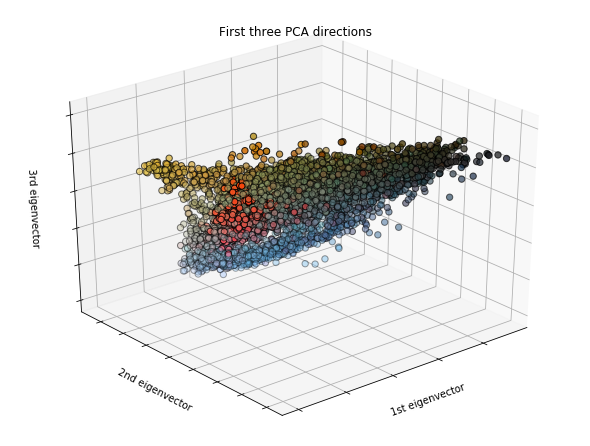

In [489]:



#xyLable.shape
X_reduced = y_multirf

fig = plt.figure(1, figsize=(8, 6))

ax = Axes3D(fig, elev=-150, azim=130)
#X_reduced = PCA(n_components=3).fit_transform(iris.data) ,

print(X_reduced.shape)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_test,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


(26215, 3)


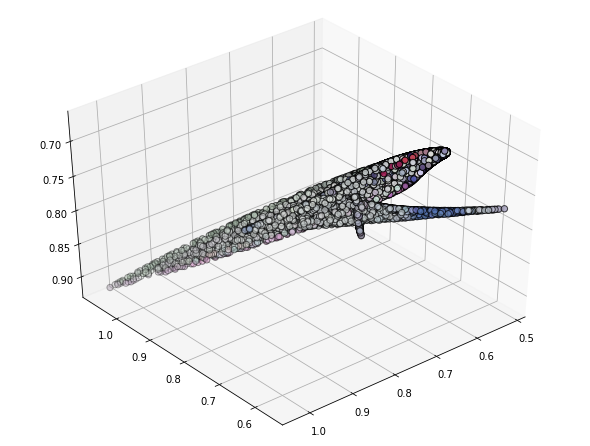

In [191]:
X_reduced = y_svr

fig = plt.figure(1, figsize=(8, 6))

ax = Axes3D(fig, elev=-140, azim=130)
#X_reduced = PCA(n_components=3).fit_transform(iris.data) ,

print(X_reduced.shape)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_test,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

PSNR 11.367211
PSNR 11.36721
epochs ; batch_size = 20 , 128


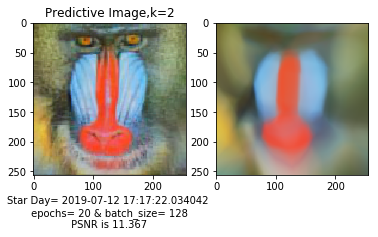

In [463]:
def psnr(original, contrast):
    [width, height, color] = original.shape
    error = np.zeros((width, height, color), dtype=int)  # uint8'
    error = (original[0:width, 0:height, 0:color] - contrast[0:width, 0:height, 0:color]) ** 2

#     print("error[0,0:2,:]=", error[0, 0:2, :])
#     print("original[0,0:2,:]=", original[0, 0:2, :])
#     print("contrast[0,0:2,:]=", contrast[0, 0:2, :])
#     print("original[0,0:2,:]-contrast[0,0:15,:]=", "error[0,0:5,:]=", original[0, 0:2, :] - contrast[0, 0:2, :])

#     print("np.sum(error).info=", np.sum(error), "/width*height*color= ", width * height * color)
    mse = np.sum(error) / (width * height * color)

#     print("error.info", error.dtype, error.shape)
#     print("255**2 = ", 255 ** 2, "& mse=", mse)
#     print("255**2/mse=", 255 ** 2 / mse)

    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    psnr=(20 * math.log10(PIXEL_MAX)) - (10 * math.log10(mse))
    #print("PSNR",'%.6f'%(psnr))
    
    return psnr


# regr_multirf , svr_multirf ,regr_rf
pr3= regr_multirf.predict(FrgbPredict)
pr3=np.reshape(pr3, (width*k,height*k, 3), order='F')  # C ,F
pr3 *= 255//1
pr3=pr3.astype(int) # 'uint8'

pr4= regr_rf.predict(FrgbPredict)
pr4=np.reshape(pr4, (width*k,height*k, 3), order='F')  # C ,F
pr4 *= 255//1
pr4=pr4.astype(int) # 'uint8'


d=psnr(imTarry,pr3)  # imog , imog2
print("PSNR",'%.5f'%(d))
PSNR='%.3f'%(d)
print("epochs ; batch_size =",epochs ,",",batch_size )



plt.subplot(1, 2, 1)
plt.title("Predictive Image,k=%s"%(k) )# title
plt.xlabel("Star Day= %s \n epochs= %s & batch_size= %s \n PSNR is %s "%(dt.today(),epochs, batch_size,PSNR))#x轴上的
plt.imshow(pr3)


plt.subplot(1, 2, 2)
plt.imshow(pr1)
plt.show()





<===============================================>
k ,width & height = 2 256 256
rgbPredict[:2] [[154. 129. 161.]
 [127. 127. 127.]]
rgbPredict.shape (262144, 3)
imog2 imof (256, 256, 3) [[154 129 161]
 [201 180 211]]
<-1---------------------------------------------->


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NameError: name 'psnr' is not defined

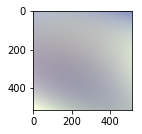

In [192]:

pr1= svr_multirf.predict(FrgbPredict)

pr1=np.reshape(pr1, (width*k,height*k, 3), order='F')  # C ,F
pr1 *= 255//1

p_pr1=pr1.astype(int) # 'uint8'

plt.subplot(2, 2, 2)
plt.imshow(p_pr1)


d=psnr(imog,p_pr1)  # imog , imog2
print("PSNR",'%.5f'%(d))
PSNR='%.3f'%(d)
print("epochs ; batch_size =",epochs ,",",batch_size )

# end = time.time()
# elapsed = end - tStart
# print ("Time taken: ", ('%.3f'%(elapsed/60)), "mins.") # (seconds/1 , min /60)



plt.title("Predictive Image,k=%s"%(k) )# title
plt.xlabel("Star Day= %s \n epochs= %s & batch_size= %s \n PSNR is %s "%(dt.today(),epochs, batch_size,PSNR))#x轴上的